In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

## authorship information
__author__ = "Alex Tavkhelidze"<br>
__credits__ = ["Bernd Brinkmann", "Luigi Menale", "Arif Haidari", "Romain Lesieur"]<br>
__email__ = <a href="mailto:&#106;&#101;&#111;&#115;&#064;&#109;&#097;&#105;&#108;&#046;&#099;&#111;&#109;">jeos [at] mail [dot] com</a><br>
__status__ = "Development"<br>
__project__ = "Plant Recognition"<br>
__scope__ = "DataScientest's Bootcamp in Data Science"

#### materials used besides own contribution:
https://medium.com/international-school-of-ai-data-science/increase-the-performance-of-image-classification-models-b466e1ae3101<br>
https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv<br>
https://www.datacamp.com/tutorial/complete-guide-data-augmentation<br>
https://www.kaggle.com/code/parulpandey/overview-of-popular-image-augmentation-packages

In [ ]:
"""Showcases different augmentation techniques and tools on the representative images of the dataset:
   geometric transformations -> rotation
   color space transformations -> brightness
   geometric transformations -> combo: rotation & flip
   color space transformations -> saturation/contrast
   noise injection -> Gaussian
   blurring -> Gaussian
   6th order-composite augmentation -> rescale & flip & rotation & zoom in & contrast adjustment & Gaussian noise
"""

In [1]:
import os

from PIL import Image
import imageio.v3 as iio
from skimage.util import random_noise
from scipy.stats import skewnorm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import keras
from keras import layers
import keras_cv
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [2]:
# TODO: replace the arguments with your full path directory names - TODO: for Unix systems, erase the first argument

# assuming 'dir6' is the main directory containing all the class-representing folders with respective image files
img_dir = os.path.join("C:",os.sep,"Users","username","dir1","dir2","dir3","dir4","dir5","dir6") 

# path to a representative image of PlantVillage dataset's diseased (grown) plant:
img_path_grw_pl_dss = os.path.join(img_dir,"Apple___Apple_scab", "image (1).JPG")
# path to a representative image of PlantVillage dataset's healthy (grown) plant:
img_path_grw_pl_hlt = os.path.join(img_dir,"Corn___healthy", "image (1).jpg")
# path to a representative image of Seedlings' dataset's [healthy] (seedling) plant:
img_path_sdl_pl_hlt = os.path.join(img_dir,"Cleavers", "1.png")
# path to the TensorFlow Dataset
img_dir_tfds = os.path.join("C:", os.sep, "Users","username","dir1_","dir2_","dir3_","dir4_","dir5_","dir6_")

In [3]:
# loads [(opens->)reads] selected raw images (without augmentation)

# using 'imageio.v3'
img_grw_pl_dss = \
  img_grw_pl_dss_iio=iio.imread(img_path_grw_pl_dss)
img_grw_pl_hlt = \
  img_grw_pl_hlt_iio=iio.imread(img_path_grw_pl_hlt)
img_sdl_pl_hlt = \
  img_sdl_pl_hlt_iio=iio.imread(img_path_sdl_pl_hlt)
# using 'PIL'
img_grw_pl_dss_pil = Image.open(img_path_grw_pl_dss)
img_grw_pl_hlt_pil = Image.open(img_path_grw_pl_hlt)
img_sdl_pl_hlt_pil = Image.open(img_path_sdl_pl_hlt)
# using 'tensorflow_datasets'
builder = tfds.ImageFolder(img_dir_tfds)
ds = builder.as_dataset(split='train', shuffle_files=True)

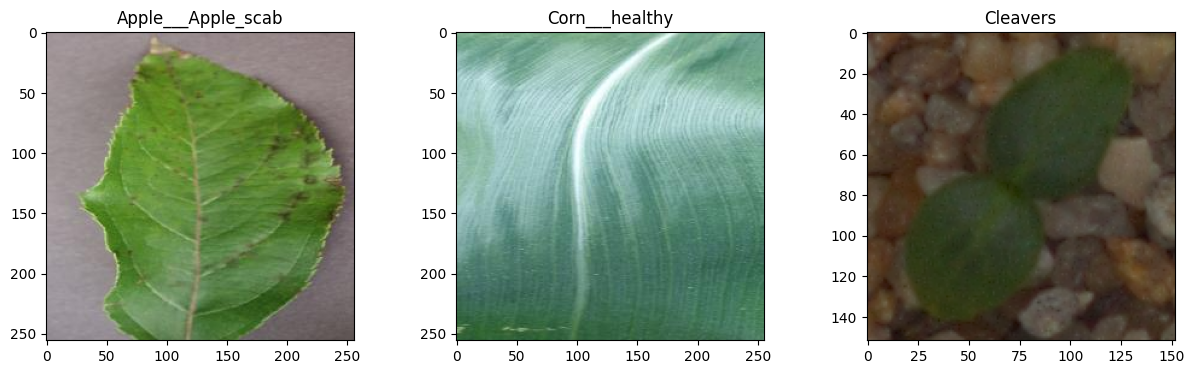

In [4]:
# plots selected raw images (without augmentation)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(img_grw_pl_dss)
axs[0].set_title("Apple___Apple_scab")

axs[1].imshow(img_grw_pl_hlt)
axs[1].set_title("Corn___healthy")

axs[2].imshow(img_sdl_pl_hlt)
axs[2].set_title("Cleavers")

plt.show();plt.close();

In [ ]:
# augmentation I.1: geometric transformations -> rotation
# using tensorflow/keras/ImageDataGenerator

MAX_ROT = 360
FILL_MODE = 'nearest'
BATCH_SZ_PLOT = 6

datagen = ImageDataGenerator(rotation_range=MAX_ROT, fill_mode=FILL_MODE)

# preprocesses loaded images
img_grw_pl_dss_arr = np.asarray(img_grw_pl_dss_pil)
img_grw_pl_dss_arr_exdim = np.expand_dims(img_grw_pl_dss_arr, axis=0)
img_grw_pl_hlt_arr = np.asarray(img_grw_pl_hlt_pil)
img_grw_pl_hlt_arr_exdim = np.expand_dims(img_grw_pl_hlt_arr, axis=0)
img_sdl_pl_hlt_arr = np.asarray(img_sdl_pl_hlt_pil)
img_sdl_pl_hlt_arr_exdim = np.expand_dims(img_sdl_pl_hlt_arr, axis=0)

# creates iterators
aug_iter_grw_pl_dss = datagen.flow(img_grw_pl_dss_arr_exdim, batch_size=1)
aug_iter_grw_pl_hlt = datagen.flow(img_grw_pl_hlt_arr_exdim, batch_size=1)
aug_iter_sdl_pl_hlt = datagen.flow(img_sdl_pl_hlt_arr_exdim, batch_size=1)

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_dss = next(aug_iter_grw_pl_dss)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_dss)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_hlt = next(aug_iter_grw_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_sdl_pl_hlt = next(aug_iter_sdl_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_sdl_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

In [ ]:
# augmentation II.1: color space transformations -> brightness
# using tensorflow/keras/ImageDataGenerator

# BRI_RNG = [0.2,2.0]
BRI_RNG = [-255//4,255//4]
FILL_MODE = 'nearest'
BATCH_SZ_PLOT = 6

# customized preprocessing function
def random_brightness(image):
    image = image[:,:,::-1]
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)

    value = np.random.default_rng().random()*(BRI_RNG[1] - BRI_RNG[0])+BRI_RNG[0]
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv.merge((h, s, v))
    img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
    img = img[:,:,::-1]
    return img

# datagen = ImageDataGenerator(brightness_range=BRI_RNG, fill_mode=FILL_MODE)
datagen = ImageDataGenerator(preprocessing_function=random_brightness, fill_mode=FILL_MODE)

# preprocesses loaded images
img_grw_pl_dss_arr = np.asarray(img_grw_pl_dss_pil)
img_grw_pl_dss_arr_exdim = np.expand_dims(img_grw_pl_dss_arr, axis=0)
img_grw_pl_hlt_arr = np.asarray(img_grw_pl_hlt_pil)
img_grw_pl_hlt_arr_exdim = np.expand_dims(img_grw_pl_hlt_arr, axis=0)
img_sdl_pl_hlt_arr = np.asarray(img_sdl_pl_hlt_pil)
img_sdl_pl_hlt_arr_exdim = np.expand_dims(img_sdl_pl_hlt_arr, axis=0)

# creates iterators
aug_iter_grw_pl_dss = datagen.flow(img_grw_pl_dss_arr_exdim, batch_size=1)
aug_iter_grw_pl_hlt = datagen.flow(img_grw_pl_hlt_arr_exdim, batch_size=1)
aug_iter_sdl_pl_hlt = datagen.flow(img_sdl_pl_hlt_arr_exdim, batch_size=1)

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_dss = next(aug_iter_grw_pl_dss)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_dss)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_grw_pl_hlt = next(aug_iter_grw_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_grw_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(5*3,4*2))
axs = ax.reshape(1,-1)[0]

for i in range(BATCH_SZ_PLOT):
  image_sdl_pl_hlt = next(aug_iter_sdl_pl_hlt)[0].astype('uint8')

  axs[i].imshow(image_sdl_pl_hlt)
  axs[i].axis('off')
plt.show();plt.close();

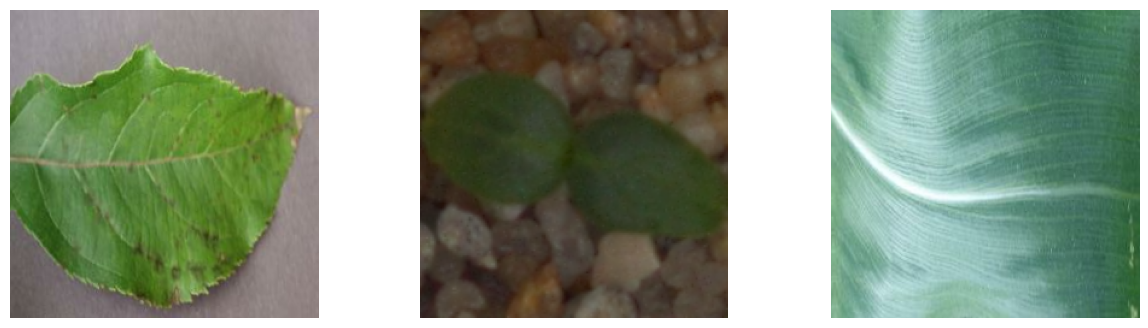

In [24]:
# augmentation I.13: geometric transformations -> combo: rotation & flip
# using 'keras.Sequential'

FLIP_TP = "horizontal_and_vertical"
MAX_ROT = 0.4

# sets augmentation layers
rotation_flip = keras.Sequential([
  layers.RandomFlip(FLIP_TP),
  layers.RandomRotation(MAX_ROT),
])

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  axs[i].imshow(rotation_flip(example["image"]).numpy()/255)
  axs[i].axis("off")
  i+=1
plt.show();plt.close();

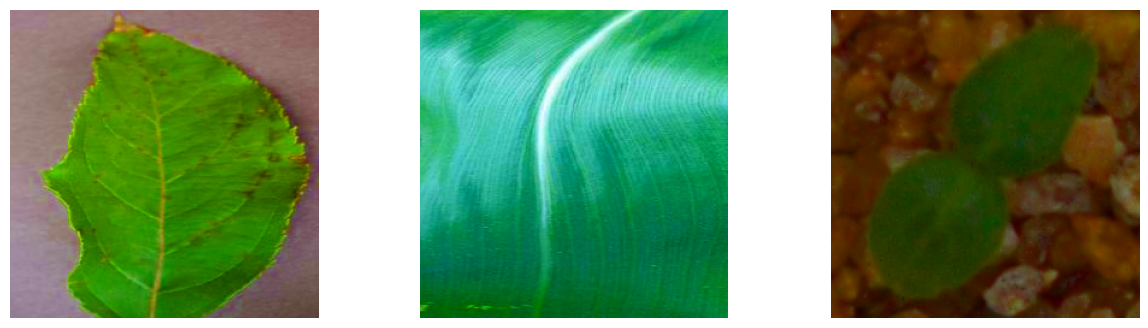

In [9]:
# augmentation II.2: color space transformations -> saturation/contrast
# using 'tf.image'

SAT_FCT = 3

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  axs[i].imshow(tf.image.adjust_saturation(example["image"],SAT_FCT))
  axs[i].axis("off")
  i+=1
plt.show();plt.close();

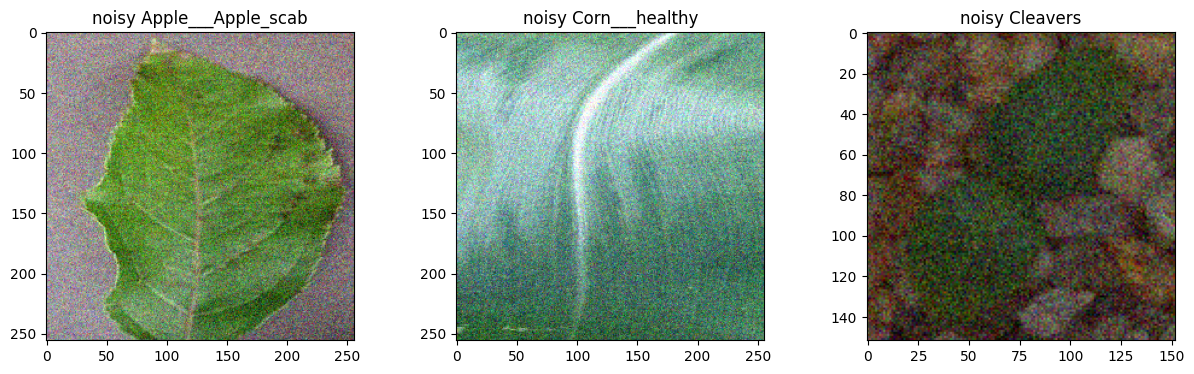

In [10]:
# augmentation III.1: noise injection -> Gaussian
# using 'skimage'

GSN_MEAN = 0
GSN_VAR = 0.01

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(random_noise(img_grw_pl_dss,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[0].set_title("noisy Apple___Apple_scab")

axs[1].imshow(random_noise(img_grw_pl_hlt,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[1].set_title("noisy Corn___healthy")

axs[2].imshow(random_noise(img_sdl_pl_hlt,mode='gaussian', mean = GSN_MEAN, var=GSN_VAR))
axs[2].set_title("noisy Cleavers")

plt.show();plt.close();

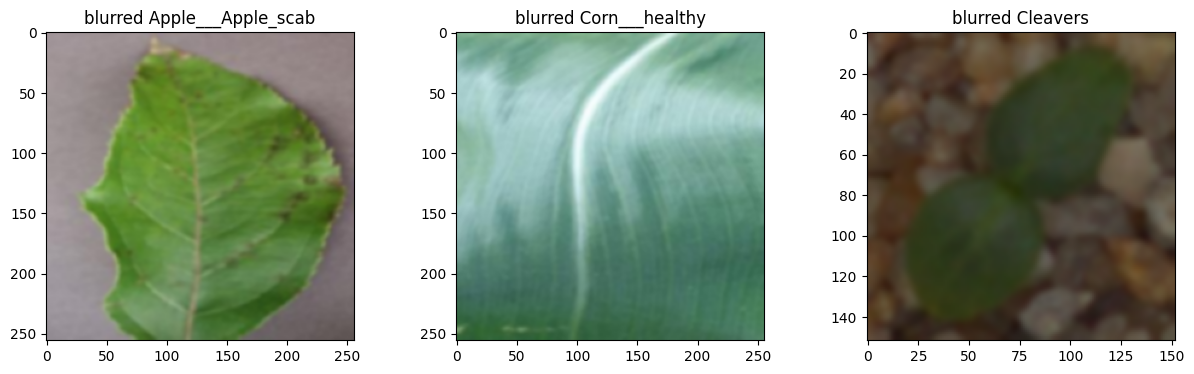

In [11]:
# augmentation IV.1: blurring -> Gaussian
# using 'cv2'

BLR_FLT = (7,7)
BLR_STD_XY = 0

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]

axs[0].imshow(cv.GaussianBlur(img_grw_pl_dss,BLR_FLT,BLR_STD_XY))
axs[0].set_title("blurred Apple___Apple_scab")

axs[1].imshow(cv.GaussianBlur(img_grw_pl_hlt,BLR_FLT,BLR_STD_XY))
axs[1].set_title("blurred Corn___healthy")

axs[2].imshow(cv.GaussianBlur(img_sdl_pl_hlt,BLR_FLT,BLR_STD_XY))
axs[2].set_title("blurred Cleavers")

plt.show();plt.close();

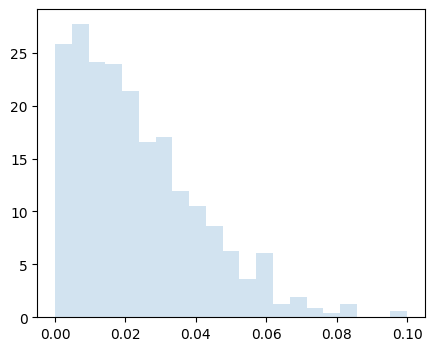

In [12]:
# helper function
def right_skewed_distr(magnitude, pool_size, min_n, max_n):
  """Picks a random number from the tuned right-skewed distribution.

  Args:
      magnitude: skewness parameter (magnitude = 0 is identical to a normal distribution)
      pool_size: sample size drawn from the distribution
      min_n: left margin of the sample
      max_n: right margin of the sample

  Returns:
      a number, randomly chosen from the selectively margined sample of preset size drawn from the right-skewed distribution
  """
  r = skewnorm.rvs(magnitude, size=pool_size) 
  r_min = min(r)
  r_max = max(r) 
  r_rng = max(r) - min(r)
  r_minmax = (r - r_min)/r_rng
  r_scaled = r_minmax *(max_n - min_n) + min_n
  return np.random.choice(r_scaled)

# populates the list with the sample, drawn from the defined right-skewed distribution
gen_lst = [right_skewed_distr(100, 1000, 0, 0.1) for i in range(1000)]

# plots the sample histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5*1,4*1))
ax.hist(gen_lst, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
plt.show();plt.close();

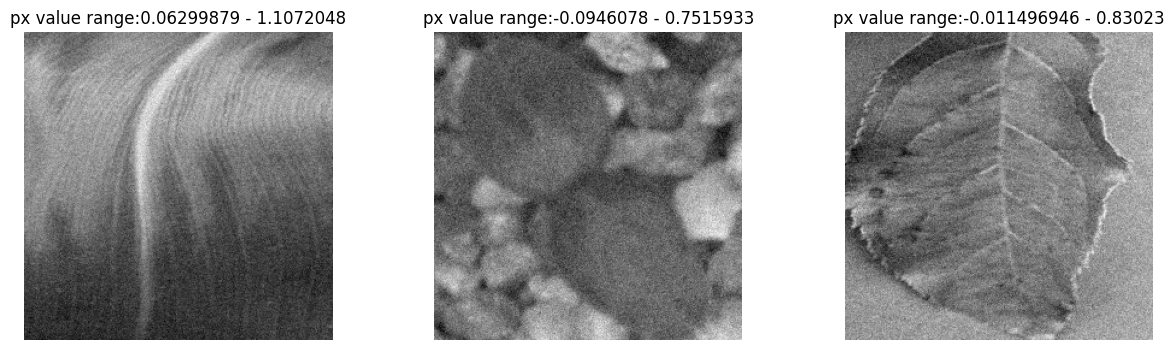

In [20]:
# augmentation III.13: (6-)combo -> rescale & flip & rotation & zoom in & contrast adjustment & Gaussian noise 
# using 'keras.Sequential'

px_rescale = 1./255
rot_2pi_fac_rng = (-0.05, 0.05)
zoom_in_rng = (-0.2, 0)
contr_1plumin_rng = (0, 1)
brig_rng = (-0.2, 0.2)
skew_mgn = 100
skew_dist_size = 1000
gaus_noise_std = right_skewed_distr(skew_mgn, skew_dist_size, 0, 0.1)

#sets augmentation layers
combo = keras.Sequential([
  layers.Resizing(128, 128),
  keras_cv.layers.Grayscale(),
  layers.RandomFlip("horizontal_and_vertical"),
  # layers.RandomRotation(rot_2pi_fac_rng),
  layers.RandomZoom(zoom_in_rng),
  layers.RandomContrast(contr_1plumin_rng),
  layers.RandomBrightness(brig_rng),
  layers.Rescaling(px_rescale),
  layers.GaussianNoise(gaus_noise_std)
])

# plots selected images (with augmentation[s])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(5*3,4*1))
axs = ax.reshape(1,-1)[0]
i=0

for example in ds:
  image = combo(example["image"], training = True)
  axs[i].imshow(image, cmap = "gray")
  axs[i].axis("off")
  axs[i].set_title("px value range:" + str(image.numpy().min())+" - "+str(image.numpy().max()))
  i+=1

# surpresses warnings (which are purely 'imshow'-specific and thus augmentation-irrelevant)
# alternatively, clipping within the expected margin of values could be carried out
clear_output() 

plt.show();plt.close();

***